<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br></center></h1>

In this project, you are going to implement two unsupervised learning techniques. In the first task, you are asked to implement **k-means clustering** algorithm using the data provided in `kmeans_data.zip`. In the second task, you need to implement **PCA** and apply dimensionality reduction on the data provided in `USPS.mat`. 

# (50 pts) Task 1: K-Means Clustering

Please download `kmeans_data.zip`. In this problem, ground truth cluster assignments are given in `labels.npy`. 

## (10 pts) Task 1.1: Plot Clusters

Plot the data using scatter plot. Assign different colors to different classes.

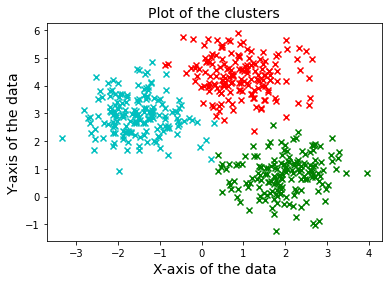

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

data = np.load("kmeans_data/data.npy")
label = np.load("kmeans_data/label.npy")

for i in range(len(label)):
    if(label[i] == 0):
        plt.scatter(data[i,0],data[i,1],marker='x',color='r')
    elif(label[i] == 1):
        plt.scatter(data[i,0],data[i,1],marker='x',color='g')
    elif (label[i] == 2):
        plt.scatter(data[i,0],data[i,1],marker='x',color='c')

plt.title("Plot of the clusters",fontsize=14)
plt.xlabel("X-axis of the data",fontsize=14)
plt.ylabel("Y-axis of the data",fontsize=14)
plt.show()

## (30 pts) Task 1.2: K-Means Implementation

Implement k-means clustering algorithm by yourself using the number of iterations as the stopping condition. You can use built-in functions only for side-tasks such as norm computation, minimum element search and mean calculation, not for the clustering itself.

In [2]:
def k_means(K,iterations):
    np.random.seed(1)
    centers_indices = np.random.randint(500,size=K)
    centers = []

    for i in range(K):
        centers.append(data[centers_indices[i]])
    
    for j in range(iterations):
        c = [[] for i in range(K)]
        index = [[] for i in range(K)]
        dst = np.zeros(K)
        
        for i in range(len(data)):
            for k in range(K):
                dst[k] = np.linalg.norm(data[i]-np.array(centers[k]))
                
            closest_cluster = np.argmin(dst)
            c[closest_cluster].append(data[i])
            index[closest_cluster].append(i)
        
        for l in range(K):
            centers[l] = np.mean(c[l],axis=0)

    accuracy = 0
    labelArray = []
    
    for i in range(K):
        labelDict = {}
        
        for j in range(len(c[i])):
            if label[index[i][j]] in labelDict: 
                labelDict[label[index[i][j]]] += 1
            else:
                labelDict[label[index[i][j]]] = 1
        
        labelArray.append(labelDict)
        maxLabel = list(labelDict.keys())[0]
        maxLabelAmount = list(labelDict.values())[0]
        
        for lbl in labelDict:
            if(labelDict[lbl] >= maxLabelAmount):
                maxLabel = lbl
                maxLabelAmount = labelDict[lbl]    
        
        accuracy += maxLabelAmount

    return c,centers,accuracy/len(data)

In [3]:
for l in range(1,10):
    c,centers,acc = k_means(3,l)
    print("Iteration ",l,": ", acc)

Iteration  1 :  0.802
Iteration  2 :  0.964
Iteration  3 :  0.988
Iteration  4 :  0.994
Iteration  5 :  0.994
Iteration  6 :  0.994
Iteration  7 :  0.994
Iteration  8 :  0.994
Iteration  9 :  0.994


## (10 pts) Taks 1.3: Evaluation

Run k-means $9$ times with number of iterations $(N)$ $= \{1, 2, ..., 9\}$. Plot the final clustering assignments as a scatter plot for each run as 3x3 `matplotlib subplot`. Visually investigate the effect of the number of iterations on obtaining the optimal clustering and find the convergence point by comparing the plots with the one in Task 1.1. If the model does not converge at $9$ iterations, you can select $9$ other $N$ to effectively show the progress of the clustering.

For a fair comparison, start each run with the same initial random assignments. You can use `np.random.seed(1)` to this purpose.

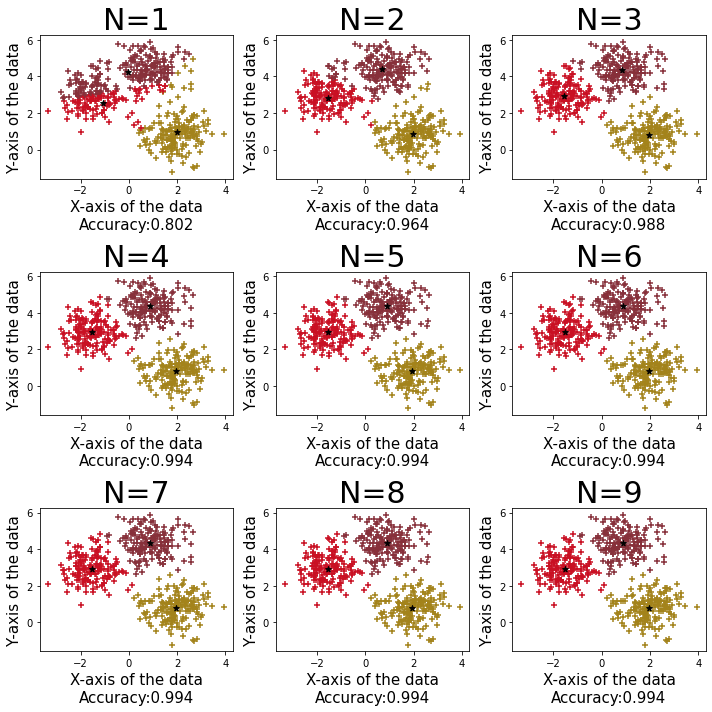

In [6]:
from random import randint

colors = []
size = 3
k = 3  # number of cluster is selected as 3

for i in range(k):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

f,x = plt.subplots(nrows=size, ncols=size)

for i in range(1,size**2+1):
    c,centers,acc = k_means(k,i)
    
    for m in range(k):
        for j in range(len(c[m])):
            x[int((i-1)/size)][(i-1)%size].scatter(c[m][j][0],c[m][j][1],marker='+',color=colors[m])
        
        x[int((i-1)/size)][(i-1)%size].scatter(centers[m][0],centers[m][1],marker='*',color='k')

    x[int((i-1)/size)][(i-1)%size].set_title('N='+str(i),fontsize=30)
    x[int((i-1)/size)][(i-1)%size].set_xlabel("X-axis of the data\nAccuracy:"+str(acc),fontsize=15)
    x[int((i-1)/size)][(i-1)%size].set_ylabel("Y-axis of the data",fontsize=15)

plt.rcParams['figure.figsize'] = [10,10]
plt.tight_layout()  
plt.show() 

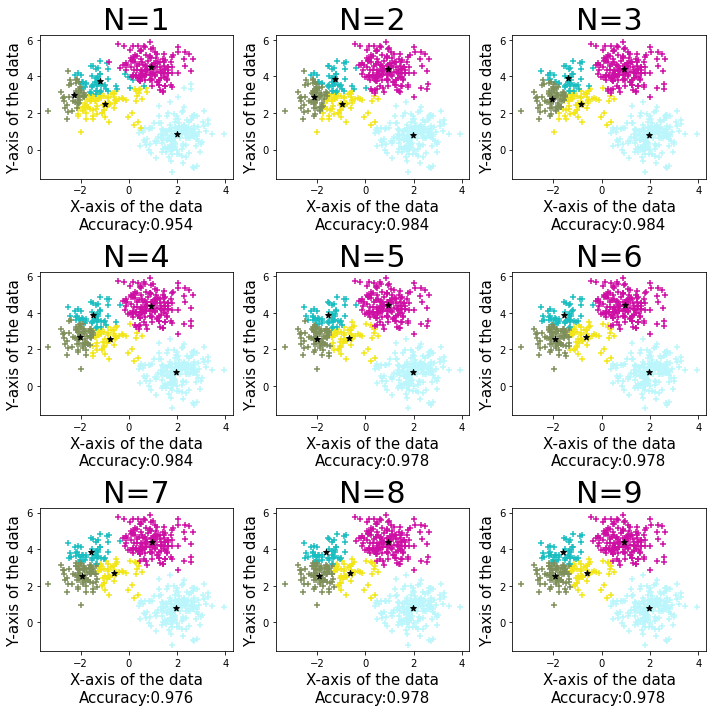

In [8]:
from random import randint

colors = []
size = 3
k = 5 # number of cluster is selected as 5

for i in range(k):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

f,x = plt.subplots(nrows=size, ncols=size)

for i in range(1,size**2+1):
    c,centers,acc = k_means(k,i)
    for m in range(k):
        for j in range(len(c[m])):   
            x[int((i-1)/size)][(i-1)%size].scatter(c[m][j][0],c[m][j][1],marker='+',color=colors[m])
        
        x[int((i-1)/size)][(i-1)%size].scatter(centers[m][0],centers[m][1],marker='*',color='k')

    x[int((i-1)/size)][(i-1)%size].set_title('N='+str(i),fontsize=30)
    x[int((i-1)/size)][(i-1)%size].set_xlabel("X-axis of the data\nAccuracy:"+str(acc),fontsize=15)
    x[int((i-1)/size)][(i-1)%size].set_ylabel("Y-axis of the data",fontsize=15)

plt.rcParams['figure.figsize'] = [10,10]
plt.tight_layout()  
plt.show() 

# (50 pts) Task 2: Principal Component Analysis (PCA)

Please load the whole dataset in `USPS.mat` using the function `loadmat` in `Scipy.io`. The matrix $A$ contains all the images of size 16 by 16. Each of the 3000 rows in $A$ corresponds to the image of one handwritten digit (between 0 and 9).

In [9]:
import scipy.io as sio

data = sio.loadmat("USPS.mat")
A = data['A']
print("Shape of A: ",np.shape(A))

Shape of A:  (3000, 256)


## (30 pts) Task 2.1: PCA Implementation

Implement PCA and apply it to the data using $d = 50, 100, 200, 300$ principal components. You are not allowed to use an existing implementation. You can use existing packages for eigen-decomposition. **Do not forget to standardize the data before eigen-decomposition.**

In [10]:
from numpy import linalg as LA

N = 3000
mean = np.mean(A,axis=0) #mean of the data
mean_mat = mean*np.ones((3000,256))
X = A-mean_mat #standartize A
X_T = np.transpose(X)  
S = (X_T.dot(X))/N #covariance matrix

def PCA(d):
    e_val, e_vec = LA.eig(S) # eigenvalues and vectors
    G = []
    
    for i in range(d):
        max_eval = np.argmax(e_val)
        G = np.append(G,e_vec[:,max_eval])
        e_val = np.delete(e_val,max_eval)
        e_vec = np.delete(e_vec,max_eval,axis=1)
    
    G_T = np.reshape(G,(d,256))
    
    return G_T
    

In [11]:
G_50 = PCA(50)
G_100 = PCA(100)
G_200 = PCA(200)
G_256 = PCA(256)

## (15 pts) Task 2.2: Image Reconstruction

Reconstruct images using the selected principal components from Task 2.1

In [12]:
GT_50 = np.transpose(G_50)
R_50 = np.transpose(GT_50.dot(G_50.dot(X_T)))

GT_100 = np.transpose(G_100)
R_100 = np.transpose(GT_100.dot(G_100.dot(X_T)))

GT_200 = np.transpose(G_200)
R_200 = np.transpose(GT_200.dot(G_200.dot(X_T)))

GT_256 = np.transpose(G_256)
R_256 = np.transpose(GT_256.dot(G_256.dot(X_T)))

## (5 pts) Task 2.3: Evaluation

Visualize the reconstructed images for the images at indices $i = 0, 500, 1000, 2000$ for $d=50, 100, 200, 300$. Create a 4x5 subplot where the rows correspond to images at each index, first four columns correspond to reconstructed images using each $d$ and the last column is the raw image, i.e. before PCA. Comment on your results.

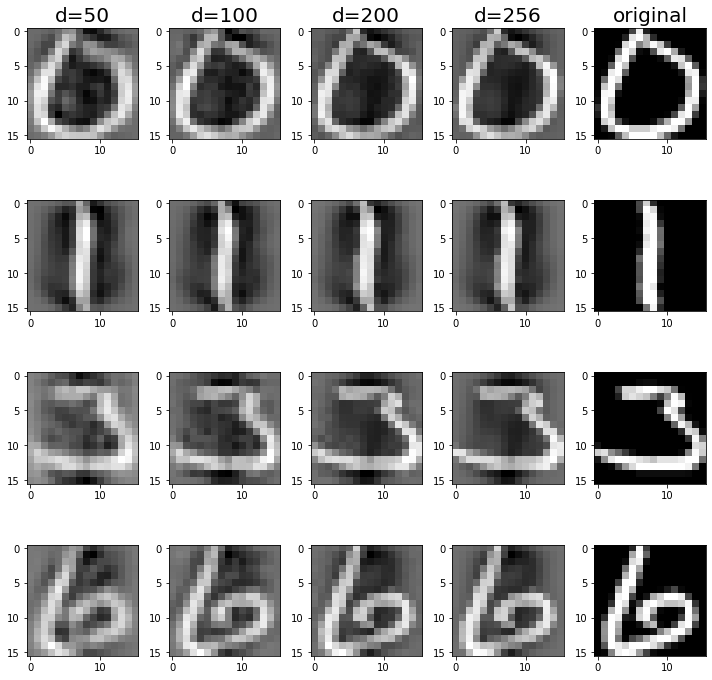

In [13]:
f,x = plt.subplots(4,5)

images = np.reshape(A,(3000,16,16))

images50 = np.reshape(R_50,(3000,16,16))
images100 = np.reshape(R_100,(3000,16,16))
images200 = np.reshape(R_200,(3000,16,16))
images256 = np.reshape(R_256,(3000,16,16))

raw_img = [images[0],images[500],images[1000],images[2000]]

img50 = [images50[0],images50[500],images50[1000],images50[2000]]
img100 = [images100[0],images100[500],images100[1000],images100[2000]]
img200 = [images200[0],images200[500],images200[1000],images200[2000]]
img256 = [images256[0],images256[500],images256[1000],images256[2000]]

for i in range(4):
    x[i][0].imshow(img50[i],cmap='gray')
    x[i][1].imshow(img100[i],cmap='gray')
    x[i][2].imshow(img200[i],cmap='gray')
    x[i][3].imshow(img256[i],cmap='gray')
    x[i][4].imshow(raw_img[i],cmap='gray')

x[0][0].set_title("d=50",fontsize=20)
x[0][1].set_title("d=100",fontsize=20)
x[0][2].set_title("d=200",fontsize=20)
x[0][3].set_title("d=256",fontsize=20)
x[0][4].set_title("original",fontsize=20)

plt.rcParams['figure.figsize'] = [10,10]
plt.tight_layout()  
plt.show()

Comments on the results can be found in the report.